# Data Visualization

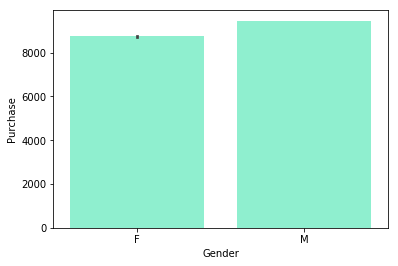

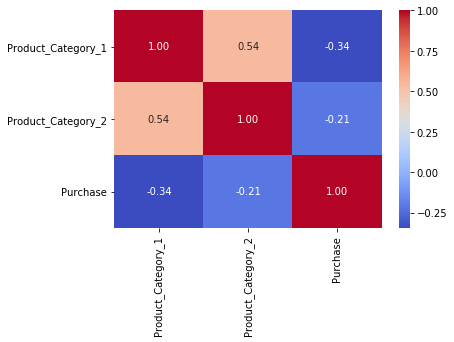

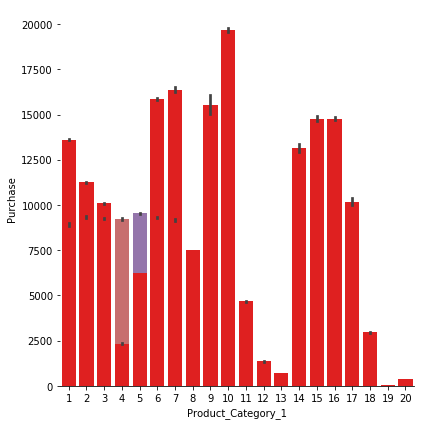

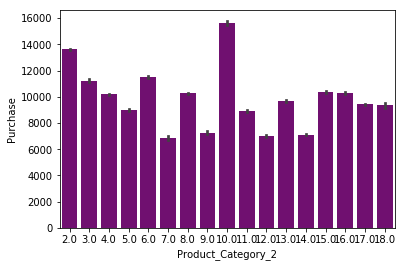

,Total,Percent
Product_Category_3,383247,0.696727
Product_Category_2,173638,0.315666
Purchase,0,0.000000
Product_Category_1,0,0.000000
Marital_Status,0,0.000000


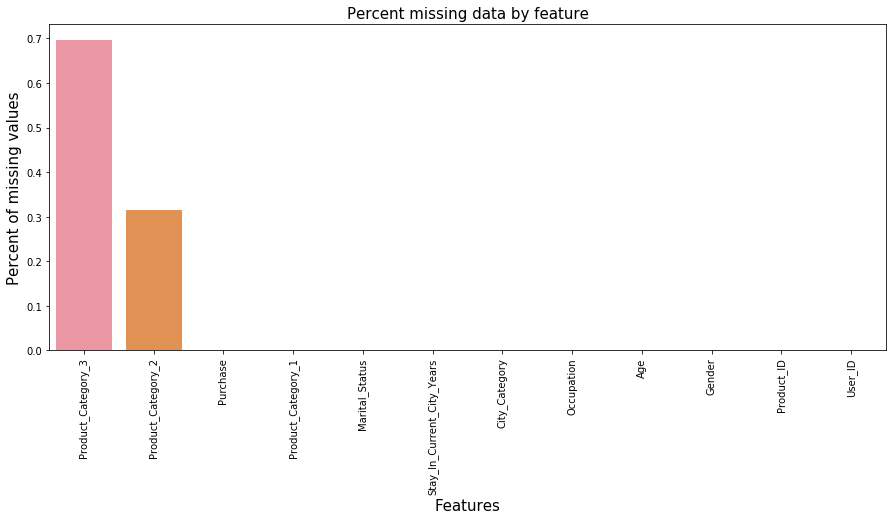

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


data=pd.read_csv('train.csv')
data.isnull().sum()
numeric_features=['Age','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2','Purchase']
cat_features=['Marital_Status','Gender','Occupation']

sns.barplot('Gender', 'Purchase', data=data, color="aquamarine")
plt.show()
sns.heatmap(data[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

g=sns.factorplot(x="Age",y="Purchase",data=data,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Purchase")


sns.barplot('Product_Category_1', 'Purchase', data=data, color="red")
plt.show()  
sns.barplot('Product_Category_2', 'Purchase', data=data, color="purple")
plt.show()  




## to plot missing values in percentage
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

# Feature Engineering 

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

%matplotlib inline


data=pd.read_csv('train.csv')
data.isnull().sum()
y=data['Purchase']
data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0],inplace=True)
data.drop(labels=["Product_Category_3","Purchase",'User_ID','Product_ID'], axis = 1, inplace = True)
#data['Age']=data[['Age']].mean()
age = np.unique(data['Age'])
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
    
data['Age'] = data['Age'].apply(map_age)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)
data = pd.get_dummies(data, columns=["City_Category"])
def map_siccy(siccy):
    if siccy=='4+':
        return 5
    else:
        return siccy
            
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(map_siccy)




# Selecting best model

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=0)


model=DecisionTreeRegressor()
model.fit(X_train,y_train)
model.score(X_train,y_train)
y_pred=model.predict(X_test)
print ('dt error ',mean_squared_error(y_test, y_pred))


lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print ('lr error ',mean_squared_error(y_test, y_pred))



rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print ('rfr error ',mean_squared_error(y_test, y_pred))


etr=ExtraTreesRegressor()
etr.fit(X_train,y_train)
y_pred=etr.predict(X_test)
print ('etr error ',mean_squared_error(y_test, y_pred))




knr=KNeighborsRegressor()
knr.fit(X_train,y_train)
y_pred=knr.predict(X_test)
print ('knr error ',mean_squared_error(y_test, y_pred))

gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred=gbr.predict(X_test)
print ('gbr error ',mean_squared_error(y_test, y_pred))


dt error  9952094.276118329
lr error  22127423.7912686
rfr error  9260308.53160578
etr error  9518967.899515815
knr error  10606959.466773322
gbr error  8990515.306134786


# Test

In [37]:
#TEST
test=pd.read_csv('test.csv')
sbt=pd.read_csv('smn.csv')
sbt['UserId']=test['User_ID']
sbt['ProductId']=test['Product_ID']
test['Product_Category_2'].fillna(test['Product_Category_2'].mode()[0],inplace=True)
test.drop(labels=["Product_Category_3",'User_ID','Product_ID'], axis = 1, inplace = True)
age = np.unique(test['Age'])
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
test['Age'] = test['Age'].apply(map_age)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test.Gender=le.fit_transform(test.Gender)
test = pd.get_dummies(test, columns=["City_Category"])
def map_siccy(siccy):
    if siccy=='4+':
        return 5
    else:
        return siccy
            
test['Stay_In_Current_City_Years'] = test['Stay_In_Current_City_Years'].apply(map_siccy)



regr = GradientBoostingRegressor(max_depth=2, random_state=0,n_estimators=200)
regr.fit(data, y)
ll=regr.predict(test)
sbt['Purchase']=ll
sbt.head(10)


,UserId,ProductId,Purchase
0,1000004,P00128942,13422.194577
1,1000009,P00113442,10215.987065
2,1000010,P00288442,6156.095921
3,1000010,P00145342,2673.496131
4,1000011,P00053842,2622.499038
5,1000013,P00350442,11741.804287
6,1000013,P00155442,13973.917141
7,1000013,P0094542,11667.314911
8,1000015,P00161842,18314.530309
9,1000022,P00067942,6138.837929
